# image filtering


In [17]:
import numpy as np
from matplotlib import pylab as plt
import cv2 as cv


In [18]:
def normalizing(img):
    
    r,c=img.shape
    maxn=np.max(img)
    minn=np.min(img)
    a=maxn-minn
    a=255/a
    
    for i in range(r):
        for j in range(c):
            img[i,j]=img[i,j]-minn
            img[i,j]= int(img[i,j]*a)  
    
            
    return img
            

In [19]:
def flip(kernel):
    dim=kernel.shape
    row=dim[0]
    times=int(dim[0]/2) #this determine how many rows have to exchange and also columns
    for i in range(times):
        row=row-1
        #flipping horizontal
        for j in range(dim[0]):
            temp=kernel[i,j]
            kernel[i,j]=kernel[row,j]
            kernel[row,j]=temp
    col=dim[0]
    #flipping columns
    
    for i in range(times):
        col=col-1
        for j in range(dim[0]):
            temp=kernel[j,i]
            kernel[j,i]=kernel[j,col]
            kernel[j,col]=temp
    return kernel
            
        
    
    

In [20]:
def padding(img,size):
    r,c=img.shape
    size=  (int(size/2))*2 #no of rows have to be added and also columns at the same time
    space=(int(size/2))
    r=r+size
    c=c+size
    paddedimg=np.zeros((r,c))
    r,c=img.shape
    for i in range(r):
        for j in range(c):
            paddedimg[i+space,j+space]=img[i,j]
    return paddedimg
            

In [21]:
def multiplyMatrixConvolution(img,kernel,i,j,size):
    r,c=kernel.shape
    i=i-size
    s=i
    j=j-size
    sum=0
    row=0
    col=0
    for k in range(i,i+r):
        col=0
        for n in range(j,j+c):
            sum=sum+kernel[row,col]*img[k,n]
            col=col+1                
        row=row+1
    return sum

In [22]:
def convolution_func(image,kernel):
    #first flip the kernel
    kernel=flip(kernel)
    
    
    tu=kernel.shape# size in the form of tuple
    size=int(tu[0]/2)# no of columns on each size padded also for rows
    imgGray=padding(image,tu[0])
    newimg=np.zeros((imgGray.shape))
    #after padding
    r,c=imgGray.shape
    #accessing the pixels which are not result of padding
    for i in range(size,r-size):
        for j in range(size,c-size):
            newimg[i,j]=multiplyMatrixConvolution(imgGray,kernel,i,j,size)
    return newimg

In [28]:
def flipHorizontal(kernel):
    i = 0
    j = kernel.shape[1] - 1
    while True:
        if i == j:
            break
        else:
            for c in range(kernel.shape[0]):
                kernel[c][i], kernel[c][j] = kernel[c][j], kernel[c][i] #Swapping
            i = i + 1
            j = j - 1
    return kernel

def flipVertical(kernel):
    i = 0
    j = kernel.shape[0] - 1
    while True:
        if i == j:
            break
        else:
            for c in range(kernel.shape[1]):
                kernel[i][c], kernel[j][c] = kernel[j][c], kernel[i][c] #Swapping
            i = i + 1
            j = j - 1
    return kernel

def flip(kernel):
    kernel = flipHorizontal(kernel)
    kernel = flipVertical(kernel)
    return kernel

def multiply(A,B):
    ans = 0
    for i in range(A.shape[0]):
        for j in range(A.shape[0]):
            ans += A[i,j] * B[i,j]
    return ans

def normalize(image):
    maxV = image.max()
    minV = image.min()
    for i in range(0,image.shape[0]):
        for j in range(0,image.shape[1]):
            image[i,j] = ((image[i,j]-minV)*255)/(maxV-minV)
    return image

def convolution(image,kernel):
    tempImg = np.zeros(shape=image.shape)
    count = int(kernel.shape[0]/2)
    for c in range(count):
        image = np.concatenate((np.zeros((image.shape[0],1), dtype=int), image), axis=1)
        image = np.concatenate((np.zeros((1,image.shape[1]), dtype=int), image), axis=0)
        image = np.append(image, np.zeros((1,image.shape[1]), dtype=int), axis=0)
        image = np.append(image, np.zeros((image.shape[0],1), dtype=int), axis=1)
    x,y = 0,0
    for i in range(0 + count,image.shape[0] - count):
        for j in range(0 + count, image.shape[1] - count):
            A = image[i-count:i+(count+1),j-count:j+(count+1)]
            tempImg[x,y] = multiply(A,kernel)
            y = y + 1
        x = x + 1
        y = 0
    return tempImg

def filter(image,kernel):
    newImg = np.zeros(shape=(image.shape[0],image.shape[1],3))
    kernel = flip(kernel)
    newImg[:,:,0] = convolution(image[:,:,0],kernel)
    newImg[:,:,1] = convolution(image[:,:,1],kernel)
    newImg[:,:,2] = convolution(image[:,:,2],kernel)
    return newImg

In [23]:
img = cv.imread('book.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
Result=np.zeros(shape=(img.shape[0]+2,img.shape[1]+2,3))
Resultfive=np.zeros(shape=(img.shape[0]+4,img.shape[1]+4,3))
ResultSeven=np.zeros(shape=(img.shape[0]+6,img.shape[1]+6,3))

R, G, B = img[:,:,0], img[:,:,1], img[:,:,2]

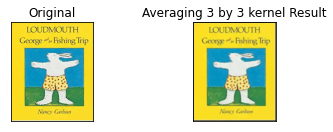

[0 0 0]


In [10]:

kernel=np.ones((3,3))*1/9
#passing 3 bt 3 kernel
#normalize img
Result[:,:,0]=normalizing(convolution_func(R,kernel))
Result[:,:,1]=normalizing(convolution_func(G,kernel))
Result[:,:,2]=normalizing(convolution_func(B,kernel))
Result=Result.astype(int)

kernelFive= np.ones((5,5))*1/25
#passing 5 by 5 kernel
Resultfive[:,:,0]=normalizing(convolution_func(R,kernelFive))
Resultfive[:,:,1]=normalizing(convolution_func(G,kernelFive))
Resultfive[:,:,2]=normalizing(convolution_func(B,kernelFive))
Resultfive=Resultfive.astype(int)

kernelSeven=np.ones((7,7))*1/49
#passing 7 by 7 kernel
ResultSeven[:,:,0]=normalizing(convolution_func(R,kernelSeven))
ResultSeven[:,:,1]=normalizing(convolution_func(G,kernelSeven))
ResultSeven[:,:,2]=normalizing(convolution_func(B,kernelSeven))
ResultSeven=ResultSeven.astype(int)

plt.subplot(221)
plt.imshow(img)
plt.title('Original')
plt.xticks([])
plt.yticks([])

plt.subplot(222)
plt.imshow(Result)
plt.title('Averaging 3 by 3 kernel Result')
plt.xticks([])
plt.yticks([])
plt.show()

cv.imwrite("3by3AveragingBook.png",Result)


In [26]:
print(Resultfive[4,4])

[230 229 103]


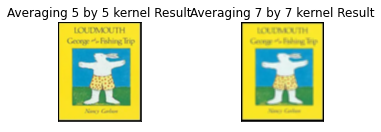

True

In [9]:

plt.subplot(223)
plt.imshow(Resultfive)
plt.title('Averaging 5 by 5 kernel Result')
plt.xticks([])
plt.yticks([])

plt.subplot(224)
plt.imshow(ResultSeven)
plt.title('Averaging 7 by 7 kernel Result')
plt.xticks([])
plt.yticks([])


plt.show()

cv.imwrite("5by5AveragingBook.png",Resultfive)
cv.imwrite("7by7AveragingBook.png",ResultSeven)


# Sharpening the image


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


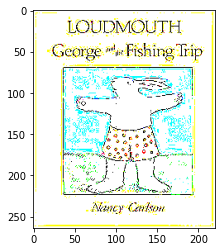

In [32]:
kernelsharpening=np.zeros((3,3))
kernelsharpening[1][1]=5
kernelsharpening[0][1]=-1
kernelsharpening[1][0]=-1
kernelsharpening[1][2]=-1
kernelsharpening[2][1]=-1
#passing 3 by 3 kernel
Resultsh=np.zeros(shape=(img.shape[0]+2,img.shape[1]+2,3),dtype=int)
Resultsh[:,:,0]= (convolution_func(R,kernelsharpening))
Resultsh[:,:,1]= (convolution_func(G,kernelsharpening))
Resultsh[:,:,2]= (convolution_func(B,kernelsharpening))

plt.imshow(Resultsh)

In [31]:
print(Resultsh)

[[[560 663 681]
  [388 439 420]
  [426 448 279]
  ...
  [406 365 214]
  [280 275 314]
  [637 634 751]]

 [[388 439 420]
  [190 220 214]
  [216 223 111]
  ...
  [194 179  62]
  [406 392 408]
  [338 344 404]]

 [[426 448 279]
  [216 223 111]
  [240 238  25]
  ...
  [180 160 -69]
  [345 369 395]
  [301 294 234]]

 ...

 [[422 402 231]
  [187 183  69]
  [156 159 -56]
  ...
  [179 121 -32]
  [293 281 245]
  [384 375 337]]

 [[302 310 325]
  [388 400 395]
  [363 360 377]
  ...
  [324 384 393]
  [379 374 367]
  [312 318 309]]

 [[657 683 773]
  [338 356 394]
  [271 297 231]
  ...
  [394 303 291]
  [313 313 303]
  [632 652 638]]]
